Z-Score Method

In [5]:
import numpy as np

data = np.array([10, 12, 12, 13, 12, 11, 1000, 12, 13, 11])

mean = np.mean (data)
sd = np.std (data)
z_scores = (data - mean) / sd
threshold = 1
outliers = np.where(np.abs(z_scores) > threshold)

print("Outliers:", data[outliers])

filtered_data = data[np.abs(z_scores) < threshold]

print("Original Data:", data)
print("Filtered Data (without outliers):", filtered_data)

Outliers: [1000]
Original Data: [  10   12   12   13   12   11 1000   12   13   11]
Filtered Data (without outliers): [10 12 12 13 12 11 12 13 11]


Inter-quartile Method


In [7]:
import pandas as pd

np.random.seed(42)
data_normal = np.random.normal(0, 1, 100)
data_outliers = np.random.normal(0, 5, 25)
data = np.concatenate([data_normal, data_outliers])
df = pd.DataFrame(data, columns=['value'])

Q1 = df['value'].quantile(0.25)
Q3 = df['value'].quantile(0.75)
IQR = Q3 - Q1


lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = [x for x in data if x < lower_bound or x > upper_bound]
print("Outliers:", outliers)

Outliers: [-7.076853710252071, -4.011386346108095, 9.430929506052651, -9.593856076495207, 12.31621056242643, -5.84339018809766, 5.714114072575103, 3.759665163433871, 3.9551597352152346, -4.546937273973695, 7.013971554680496, -7.009255313961404, 2.9342854690013516]


Box-plot Method

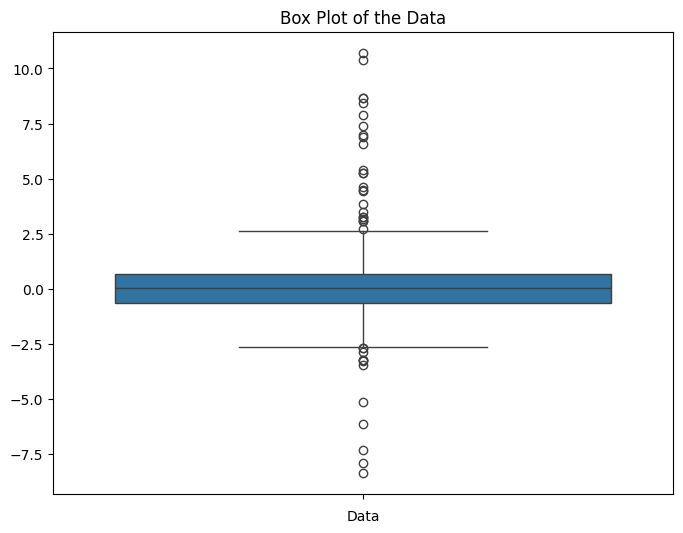

In [11]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

np.random.seed(42)
data_normal = np.random.normal(0, 1, 1000)
data_outliers = np.random.normal(0, 5, 50)
data = np.concatenate([data_normal, data_outliers])
df = pd.DataFrame(data, columns=['value'])


plt.figure(figsize=(8, 6))
sns.boxplot(data=data)


plt.title("Box Plot of the Data")
plt.xlabel("Data")

plt.show()

K-Mean Clustering

Outliers detected at indices: [ 37  61 100 103 104]


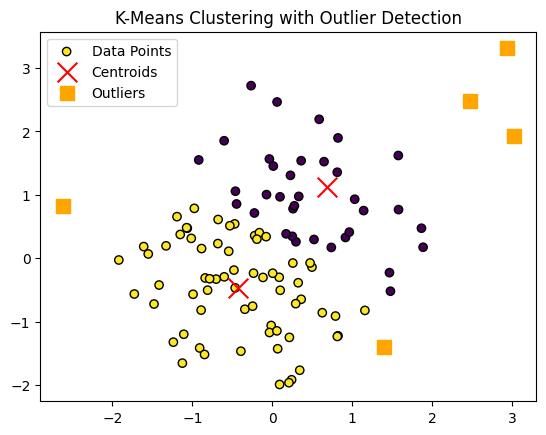

In [14]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


np.random.seed(42)
X = np.random.normal(loc=0, scale=1, size=(100, 2))
outliers = np.random.uniform(low=-4, high=4, size=(5, 2))
X = np.concatenate([X, outliers])


kmeans = KMeans(n_clusters=2).fit(X)
labels = kmeans.labels_

distances = kmeans.transform(X).min(axis=1)
threshold = 2

outliers_index = np.where(distances > threshold)[0]
print("Outliers detected at indices:", outliers_index)

plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', marker='o', edgecolor='k', label='Data Points')
# Get the centroids from the fitted KMeans object
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], s=200, c='red', marker='x', label='Centroids')
plt.scatter(X[outliers_index, 0], X[outliers_index, 1], s=100, c='orange', marker='s', label='Outliers')
plt.title('K-Means Clustering with Outlier Detection')
plt.legend()
plt.show()

DB-SCAN

Outliers detected at indices: [  7  10  15  22  37  41  53  56  61  62  67  78  89 100 101 103 104]


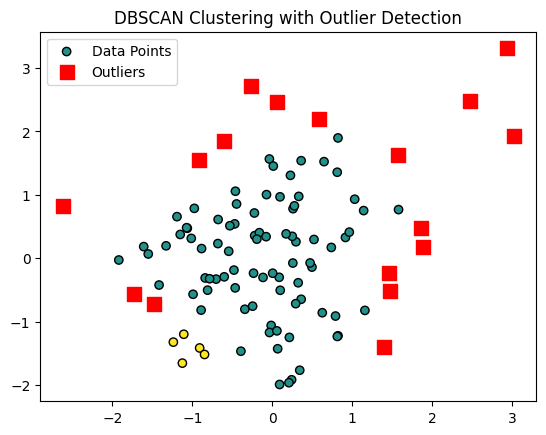

In [15]:
import numpy as np
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt


np.random.seed(42)
X = np.random.normal(loc=0, scale=1, size=(100, 2))
outliers = np.random.uniform(low=-4, high=4, size=(5, 2))
X = np.concatenate([X, outliers])

dbscan = DBSCAN(eps=0.5, min_samples=5).fit(X)
labels = dbscan.labels_
outliers_index = np.where(labels == -1)[0]
print("Outliers detected at indices:", outliers_index)


plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', marker='o', edgecolor='k', label='Data Points')
plt.scatter(X[outliers_index, 0], X[outliers_index, 1], s=100, c='red', marker='s', label='Outliers')
plt.title('DBSCAN Clustering with Outlier Detection')
plt.legend()
plt.show()